# Задание 1. Двухточечная квадратура Гаусса.
Постройте квадратурную формулу Гаусса, интегрирующую точно многочлены степеней вплоть до третьей на интервале $[a,b]$
. Заметим, что для этого достаточно построить двухточечную квадратуру.

Напишите функцию, которая возвращает веса, $w_1$ и $w_2$, и узлы, $x_1$ и $x_2$, двухточечной квадратурной формулы Гаусса с весовой функцией $w(x)=1$, т.е., интегралы вида
$$
    \int\limits_{a}^{b} f(x) dx \approx w_1 f(x_1) + w_2 f(x_2)
$$



In [19]:
from scipy.special import roots_legendre

def gauss_2(a, b):
    r"""Return nodes and weights for a two-point Gauss quadrature on [a, b].
    
    Parameters
    ----------
    a, b : float
       Boundaries of the integration interval
       
    Returns
    -------
    x1, x2, w1, w2 : float
       Nodes and weights of the quadrature.
    """
    # YOUR CODE HERE
    roots, weights = roots_legendre(2)
    roots = (b - a)/2 * roots + (a + b)/2
    weights *= (b-a)/2
    return roots[0], roots[1], weights[0], weights[1]

    raise NotImplementedError()

In [20]:
from numpy.testing import assert_allclose

x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n

for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)

# Задание 2. Вычитание интегрируемых сингулярностей.
Вычислите определённый интеграл методом трапеций с вычитанием сингулярности
$$
    I = \int\limits_{0}^{1} \frac{e^x}{\sqrt{x(1-x)}} dx.
$$

Вам могут пригодиться значения следующих определенных интегралов:
$$
\int\limits_{0}^{1} \frac{1}{\sqrt{x(1-x)}} dx = \pi, \quad \int\limits_{0}^{1} \frac{x}{\sqrt{x(1-x)}} dx = \pi / 2.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы. Cоставьте функцию, возвращающую значение интеграла методом трапеций.

$$
    I = \int\limits_{0}^{1} \frac{e^x - 1 - (e - 1)x}{\sqrt{x(1-x)}} dx + \pi + \frac{(e-1) \pi}{2}.
$$

In [2]:
import numpy as np

In [4]:
def f(X: np.array):
    return (np.exp(X)-1 - (np.e-1) * X) / (X*(1-X)) ** 0.5

def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    X = np.linspace(1e-16, 1 - 1e-16, npts)
    F = f(X)
    h = X[1]-X[0]
    return 0.5 * h * (F[0] + 2 * sum(F[1:-1]) + F[-1]) + np.pi + (np.e - 1) * np.pi / 2
    raise NotImplementedError()

In [27]:
F = []
for N in np.logspace(2, 7, 100):
    F.append(integ(int(N)))

In [28]:
import matplotlib.pyplot as plt

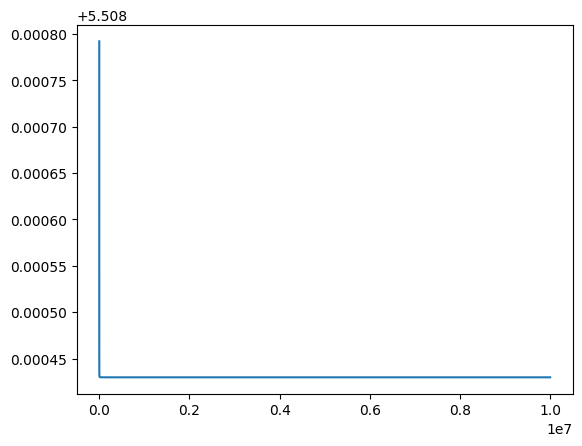

In [29]:
F = np.array(F)
N = np.array(np.logspace(2, 7, 100))
plt.plot(N,F)

# Задание 4. Вычисление интеграла с внутренней особенностью.
Найти $\delta_1$ и $\delta_2$ такие, чтобы при вычислении интеграла
$$
    J = \int\limits_{-0.5}^{0.5} |x|^{-0.5} \cdot |1-x|^{-0.5} dx
$$
модуль $|\rho| < \varepsilon$, где $\varepsilon$ - требуемая точность расчетов.


## Решение
Как я понял, хотим выкинуть участок с сингулярностью $[-\delta_1, \delta_2]$, чтобы удовлетворить требование по погрешности.  
При $x > 0$
$$
    \int\limits_{0}^{\delta_2} |x|^{-0.5} \cdot |1-x|^{-0.5} dx < 2 \int\limits_0^{\delta_2} x^{-0.5} dx = 4 \sqrt{\delta_2} < \varepsilon / 2.
$$
Получаем
$$
    \delta_2 < (\varepsilon / 8)^2.
$$

При $x < 0$
$$
    | \int\limits_{-\delta_1}^{0} |x|^{-0.5} \cdot |1-x|^{-0.5} dx | = \int\limits_{0}^{\delta_1} |x|^{-0.5} \cdot |1+x|^{-0.5} dx < \int\limits_0^{\delta_1} x^{-0.5} dx = 2 \sqrt{\delta_1} < \varepsilon / 2.
$$

Получаем
$$
    \delta_1 < (\varepsilon / 4)^2.
$$


# Задание 5. Интеграл от быстроосциллирующей функции.
Вычислите интеграл от быстроосциллирующей функции
$$
    \int\limits_0^\pi e^{-x} \sin (kx) dx
$$
для различных значений $k$ по методу Симпсона, а затем используя прием, описанный ранее, заменяя функцию $e^x$ ее интерполяционным полиномом второй степени (третьей степени). Совпадает-ли точность расчетов с ожидаемой? Сравните с точным значением интеграла, который равен
$$
    \int\limits_0^\pi e^{-x} \sin (kx) dx = \frac{k}{1+k^2} - \frac{e^{-\pi}(k \cos k\pi + \sin k\pi)}{1+k^2}
$$

In [167]:
def f(x, k):
  return np.exp(-x)*np.sin(k*x)

def simpson(F, h):
    assert (len(F)-1) % 2 == 0
    return h/3. * (F[0] + 4 * sum(F[1:-1:2]) + 2 * sum(F[2:-2:2]) + F[-1])

def tru(k):
  return k/(1+k**2) - (np.exp(-np.pi)*(k*np.cos(k*np.pi)+np.sin(k*np.pi)))/(1+k**2)

def integ(k,func):
  x = np.linspace(0, np.pi, 10001)
  F = func(x, k)
  I = simpson(F, x[1] - x[0])
  print('k =', k, ':', I, ', ошибка:', np.abs(I-tru(k)))
  return I

print('По Симпсону')

integ(10001,f)

По Симпсону
k = 10001 : -0.173869009257527 , ошибка: 0.1739733202172144


-0.173869009257527

In [168]:
tru(10001)

0.00010431095968740319

k = 10001 : -8.186290371948688e-05 , ошибка: 0.00018617386340689007
8.460586340689007e-05


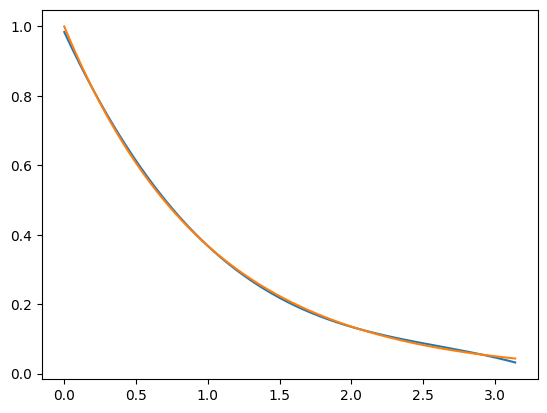

In [169]:
def f123(x, k):
    X = np.linspace(0, np.pi, 1000)
    coefficients = np.polyfit(X, np.exp(-X), 3)
    polynomial = np.poly1d(coefficients)
    plt.plot(X, polynomial(X))
    plt.plot(X, np.exp(-X))
    return (np.exp(-x) - polynomial(x)) * np.sin(k * x)

print(tru(10001)- integ(10001, f123) - 0.000101568)

# Доп задача. 

In [212]:
def u(x):
    return np.sin(2*x)

x = np.linspace(-2,2, 1000)
y = u(x) + 0.6 * np.random.normal(loc=0, scale=1, size=x.shape[0])

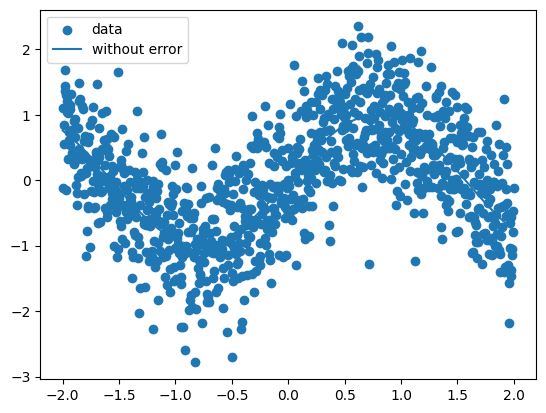

In [213]:
from scipy.interpolate import UnivariateSpline
plt.scatter(x, y, label="data")
X = np.linspace(-2,2,100)
plt.plot(X, u(X), label="without error")
plt.legend()

In [214]:
def moving_average(data, N):
    return np.convolve(data, np.ones(N)/N, mode='valid')

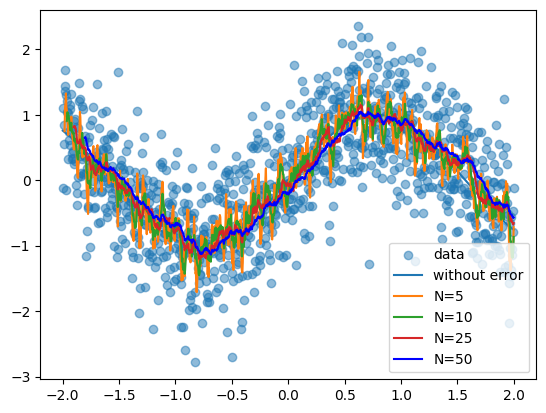

In [215]:
from scipy.interpolate import UnivariateSpline
plt.scatter(x, y, label="data", alpha=0.5)
X = np.linspace(-2,2,1000)
plt.plot(X, u(X), label="without error")


N = 5
smoothed_y = moving_average(y, N)
plt.plot(X[N-1:],smoothed_y, label="N=5")
N = 10
smoothed_y = moving_average(y, N)
plt.plot(X[N-1:],smoothed_y, label="N=10")
N = 25
smoothed_y = moving_average(y, N)
plt.plot(X[N-1:],smoothed_y, label="N=25")

N = 50
smoothed_y = moving_average(y, N)
plt.plot(X[N-1:],smoothed_y, label="N=50",c='b')

plt.legend()

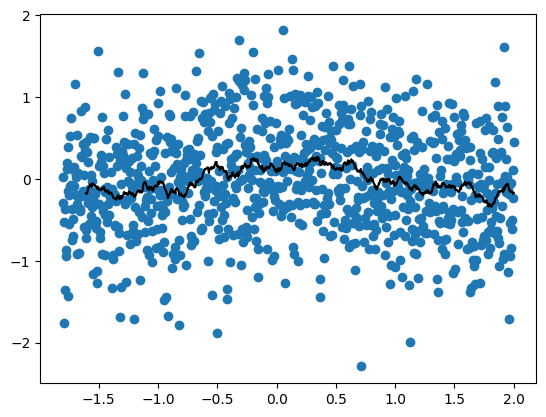

In [216]:
X2 = X[N-1:]
Y2 = y[N-1:] - smoothed_y

plt.scatter(X2, Y2)
N = 50
smoothed_y2 = moving_average(Y2, N)
plt.plot(X2[N-1:], smoothed_y2, label="N=25", c='black')

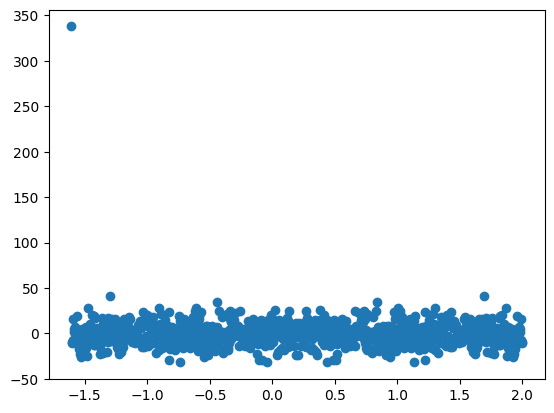

In [222]:
X3 = X2[N-1:]
Y3 = Y2[N-1:] - smoothed_y2

plt.scatter(X3, np.fft.fft(Y3**2))

# Задание 6*. Интегрирование с помощью ортогональных полиномов.
Вычислите значение следующего интеграла:
$$
    \int\limits_{0}^{2\pi} \frac{\cos x dx}{\sqrt{4\pi^2 - x^2}}
$$
сделав подходящую замену и используя соответствующий базис ортогональных полиномов. Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки. Можете пользоваться вольфрамом или sympy.